In [1]:
%reset -f

In [2]:
1+1

2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor as MLP
from sklearn.svm import SVR
import sklearn.neural_network as nn
from sklearn.ensemble import RandomForestRegressor as randomforest
from sklearn.tree import DecisionTreeRegressor as decisiontree
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.kernel_ridge import KernelRidge as kernelridge
from sklearn.linear_model import LinearRegression as LR




In [4]:
Ndim=2
Nx=10000

In [5]:
x=np.random.normal(0,1,(Nx,Ndim))
noise=np.random.normal(0,1,Nx)
x1=x[:,0]
x2=x[:,1]
y=np.heaviside(x1,0.2)-0.5*np.heaviside(x1-1,-0.3)+0.3*np.minimum(x1,0)+0.01*noise*0

xy=np.c_[x,y]
xy_pd=pd.DataFrame(xy)

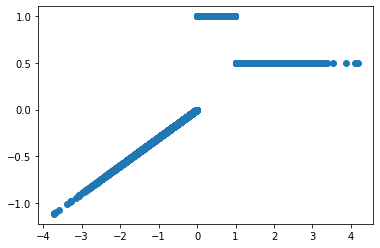

In [6]:
fig=plt.subplot()
ax1=fig.scatter(x1,y)
plt.show()


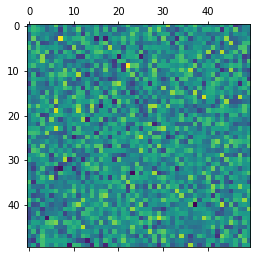

In [7]:
square1=np.random.normal(0,1,(50,50))
plt.matshow(square1)


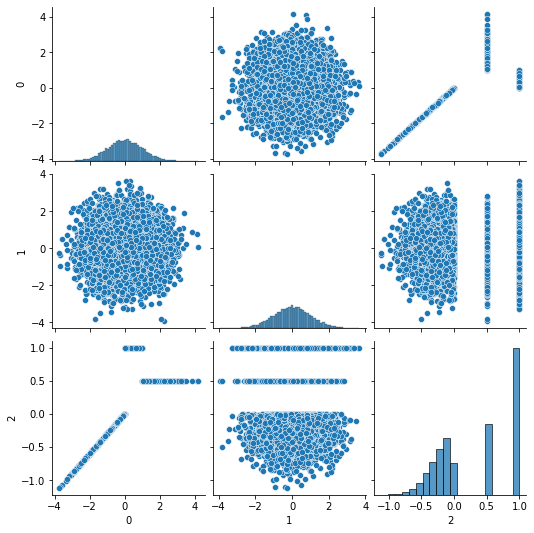

In [8]:
sns.pairplot(xy_pd)

In [9]:
pi=np.pi
temp_daily_vec=np.arange(0,1,1/(12*30))+0.02*np.random.normal(0,1,12*30)
temp_daily_mat=np.zeros((12,30))
for i_month in range(12):
    for i_day in range(30):
        day=i_month*30+i_day
temp_daily_vec=np.sin(temp_daily_vec*pi)
temp_daily_mat = np.reshape(temp_daily_vec, (30,12))


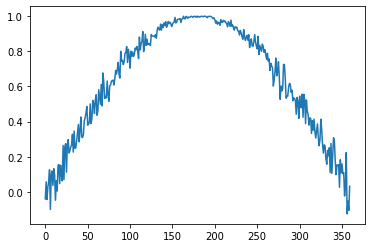

In [10]:
plt.plot(temp_daily_vec)

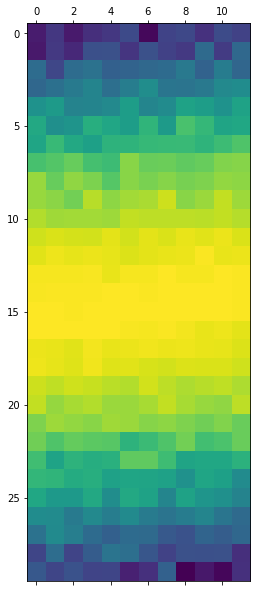

In [11]:
plt.matshow(temp_daily_mat)

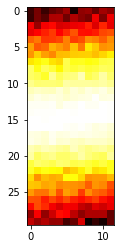

In [12]:
plt.imshow(temp_daily_mat, cmap='hot', interpolation='nearest')


<AxesSubplot:>

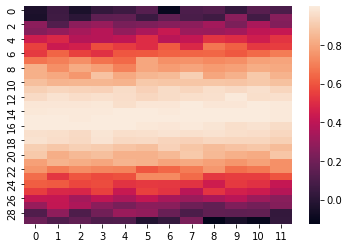

In [13]:
sns.heatmap(temp_daily_mat)

In [14]:

#solver lbfgs adam
#lbfgs doesn't work
#activation tanh relu identity

regr = MLP(random_state=1, max_iter=500,activation='relu'
                    , solver='adam',verbose=10,hidden_layer_sizes=(8,5)
                   , batch_size=200)


regr=MLP(hidden_layer_sizes=(100,)
                  ,activation='relu', solver='adam'
                  , alpha=0.0001, batch_size='auto'
                  , learning_rate='constant', learning_rate_init=0.001
                  , power_t=0.5, max_iter=200
                  , shuffle=True, random_state=None
                  , tol=0.0001, verbose=False, warm_start=False
                  , momentum=0.9, nesterovs_momentum=True
                  , early_stopping=False, validation_fraction=0.1
                  , beta_1=0.9, beta_2=0.999
                  , epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

regr = MLP(random_state=1, max_iter=500,activation='relu'
                    , solver='adam',verbose=10,hidden_layer_sizes=(100,20)
                   , batch_size=200)





In [15]:
x1_mat= x1.reshape(-1, 1)

In [16]:
regr=regr.fit(x1_mat,y)

Iteration 1, loss = 0.05348333
Iteration 2, loss = 0.01872126
Iteration 3, loss = 0.01202659
Iteration 4, loss = 0.00954625
Iteration 5, loss = 0.00804130
Iteration 6, loss = 0.00688866
Iteration 7, loss = 0.00601319
Iteration 8, loss = 0.00528152
Iteration 9, loss = 0.00473991
Iteration 10, loss = 0.00431332
Iteration 11, loss = 0.00402352
Iteration 12, loss = 0.00366204
Iteration 13, loss = 0.00340971
Iteration 14, loss = 0.00319590
Iteration 15, loss = 0.00305421
Iteration 16, loss = 0.00284407
Iteration 17, loss = 0.00270059
Iteration 18, loss = 0.00256645
Iteration 19, loss = 0.00242680
Iteration 20, loss = 0.00236246
Iteration 21, loss = 0.00221367
Iteration 22, loss = 0.00218406
Iteration 23, loss = 0.00210013
Iteration 24, loss = 0.00198874
Iteration 25, loss = 0.00192905
Iteration 26, loss = 0.00188491
Iteration 27, loss = 0.00185857
Iteration 28, loss = 0.00180673
Iteration 29, loss = 0.00173855
Iteration 30, loss = 0.00167973
Iteration 31, loss = 0.00167322
Iteration 32, los

In [17]:
#yhat=regr.predict(x)
yhat=regr.predict(x1_mat)

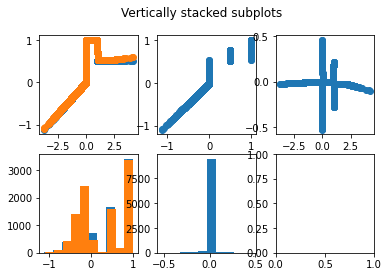

[[1.         0.99642099]
 [0.99642099 1.        ]]


In [18]:
fig, axs = plt.subplots(2,3)
fig.suptitle('Vertically stacked subplots')
axs[0,0].scatter(x1,y)
axs[0,0].scatter(x1,yhat)
axs[0,1].scatter(y,yhat)
axs[1,0].hist(y)
axs[1,0].hist(yhat)
axs[1,1].hist(y-yhat)
axs[0,2].scatter(x1,y-yhat)
plt.show()
print(np.corrcoef(y,yhat))

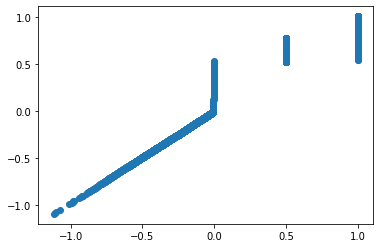

In [19]:
plt.scatter(y,yhat)

In [20]:
params0=MLP.get_params(regr)
coefs0=regr.coefs_
intercepts0=regr.intercepts_
loss0=regr.loss_
nlayers=regr.n_layers_
outactivation0=regr.out_activation_

In [21]:
params0

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 200,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100, 20),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 10,
 'warm_start': False}

In [22]:
N_neuralnet=0
for i in range(nlayers-1):
    N_neuralnet+=len(np.ndarray.flatten(coefs0[i]))
    N_neuralnet+=len(np.ndarray.flatten(intercepts0[i]))
print(N_neuralnet)

#kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’


2241


In [23]:
regr2=SVR( kernel='rbf', degree=3
                , gamma='scale', coef0=0.0
                , tol=0.001, C=1.0
                , epsilon=0.01, shrinking=True
                , cache_size=200, verbose=True, max_iter=- 1)

In [24]:
regr2.fit(x1_mat,y)

[LibSVM]

SVR(epsilon=0.01, verbose=True)

In [25]:
#yhat=regr.predict(x)
yhat=regr2.predict(x1_mat)

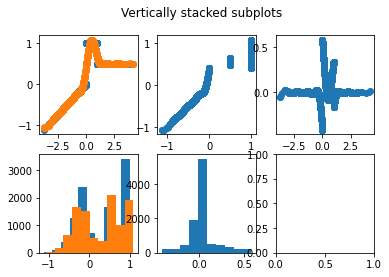

[[1.         0.96526192]
 [0.96526192 1.        ]]


In [26]:
fig, axs = plt.subplots(2,3)
fig.suptitle('Vertically stacked subplots')
axs[0,0].scatter(x1,y)
axs[0,0].scatter(x1,yhat)
axs[0,1].scatter(y,yhat)
axs[1,0].hist(y)
axs[1,0].hist(yhat)
axs[1,1].hist(y-yhat)
axs[0,2].scatter(x1,y-yhat)
plt.show()
print(np.corrcoef(y,yhat))

In [27]:
regr2.class_weight_

array([], dtype=float64)

In [28]:
regr2.intercept_
regr2.n_features_in_
regr2.n_support_
regr2.shape_fit_
regr2.support_
regr2.support_vectors_
regr2.class_weight_
#regr2.coef_
#regr2.dual_coef_

array([], dtype=float64)

In [29]:
regr3=randomforest(n_estimators=100, criterion='squared_error'
             , max_depth=5, min_samples_split=2
             , min_samples_leaf=1, min_weight_fraction_leaf=0.0
             , max_features='auto', max_leaf_nodes=None
             , min_impurity_decrease=0.0, bootstrap=True
             , oob_score=False, n_jobs=None
             , random_state=None, verbose=0
             , warm_start=False, ccp_alpha=0.0, max_samples=None)

In [30]:
regr3.fit(x1_mat,y)

RandomForestRegressor(max_depth=5)

In [31]:
#yhat=regr.predict(x)
yhat=regr3.predict(x1_mat)

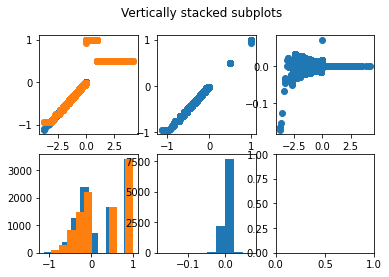

[[1.         0.99989671]
 [0.99989671 1.        ]]


In [32]:
fig, axs = plt.subplots(2,3)
fig.suptitle('Vertically stacked subplots')
axs[0,0].scatter(x1,y)
axs[0,0].scatter(x1,yhat)
axs[0,1].scatter(y,yhat)
axs[1,0].hist(y)
axs[1,0].hist(yhat)
axs[1,1].hist(y-yhat)
axs[0,2].scatter(x1,y-yhat)
plt.show()
print(np.corrcoef(y,yhat))

In [33]:
regr3.base_estimator_
regr3.estimators_[0]
#regr3.feature_importances_
#regr3.n_features_
#regr3.n_features_in_
#regr3.feature_names_in_
#regr3.n_outputs_
#regr3.oob_score_
#regr3.oob_prediction_

DecisionTreeRegressor(max_depth=5, max_features='auto', random_state=871849856)

In [34]:
regr4=decisiontree(criterion='squared_error', splitter='best'
                   , max_depth=5, min_samples_split=2, min_samples_leaf=1
                   , min_weight_fraction_leaf=0.0, max_features=None
                   , random_state=None, max_leaf_nodes=None
                   , min_impurity_decrease=0.0, ccp_alpha=0.0)

In [35]:
regr4.fit(x1_mat,y)

DecisionTreeRegressor(max_depth=5)

In [36]:
#yhat=regr.predict(x)
yhat=regr4.predict(x1_mat)

In [37]:
regr4.feature_importances_
regr4.max_features_
regr4.n_features_
regr4.n_features_in_
#regr4.feature_names_in_
regr4.n_outputs_
regr4.tree_

#explanation about extracting tree rules:
#https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py
#very long winded


C:\Users\eurot\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [38]:
regr5=GPR(kernel=None, alpha=1e-10
          , optimizer='fmin_l_bfgs_b', n_restarts_optimizer=0
          , normalize_y=False, copy_X_train=True, random_state=None)

In [39]:
regr5.fit(x1_mat,y)

GaussianProcessRegressor()

In [40]:
regr5.X_train_
regr5.y_train_
regr5.kernel_
regr5.L_ #cholesky decomposition
regr5.alpha_ #Dual coefficients of training data points in kernel space.
regr5.log_marginal_likelihood_value_
regr5.n_features_in_
#regr5.feature_names_in_

1

In [41]:
#yhat=regr.predict(x)
yhat=regr5.predict(x1_mat)

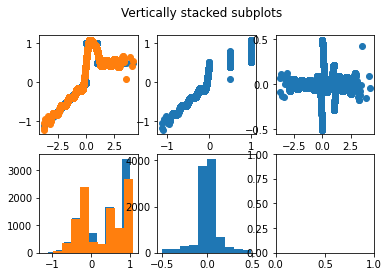

[[1.         0.97383584]
 [0.97383584 1.        ]]


In [42]:
fig, axs = plt.subplots(2,3)
fig.suptitle('Vertically stacked subplots')
axs[0,0].scatter(x1,y)
axs[0,0].scatter(x1,yhat)
axs[0,1].scatter(y,yhat)
axs[1,0].hist(y)
axs[1,0].hist(yhat)
axs[1,1].hist(y-yhat)
axs[0,2].scatter(x1,y-yhat)
plt.show()
print(np.corrcoef(y,yhat))

In [43]:
regr5.log_marginal_likelihood()

-883888919749.7792

In [44]:
regr6=kernelridge(alpha=1, kernel='rbf', gamma=None, degree=3, coef0=1, kernel_params=None)

In [45]:
regr6.fit(x1_mat,y)

KernelRidge(kernel='rbf')

In [46]:
regr6.dual_coef_
regr6.X_fit_
regr6.n_features_in_
#regr6.feature_names_in_

1

In [47]:
regr7=LR(fit_intercept=True, normalize='deprecated', 
   copy_X=True, n_jobs=None, positive=False)

In [48]:
regr7.fit(x1_mat,y)

LinearRegression()

In [49]:
#sklearn.linear_model.ARDRegression
#sklearn.linear_model.BayesianRidge

#sklearn.metrics.mean_absolute_error¶
#sklearn.metrics.mean_absolute_error¶

#sklearn.neighbors.KNeighborsRegressor
#sklearn.neighbors.RadiusNeighborsRegressor¶

#sklearn.svm.NuSVR


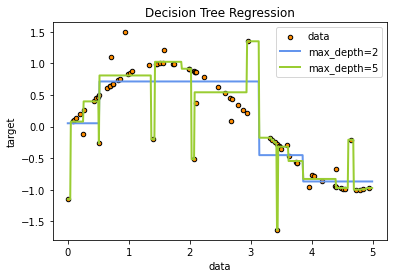

In [50]:
%reset -f

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [51]:
#at some point I'm gonna learn how to read data from csv file & write into csv from jupyter!
#I forgot everything!



In [52]:
#but the most important thing is to become paper oriented again
#you have to have some material output: citable paper is the way to go!!!


In [57]:
#linear regression
%reset -f

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
print(reg)
print(reg.coef_)

LinearRegression()
[0.5 0.5]


In [58]:
#ridge regression, penalizes weights (similar to SVM)
%reset -f

from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
print(reg)
print(reg.coef_)
print(reg.intercept_)


Ridge(alpha=0.5)
[0.34545455 0.34545455]
0.13636363636363638


LinearRegression()
[ 1.16972568  0.06090042 -0.24528683]
1.2211478235640363


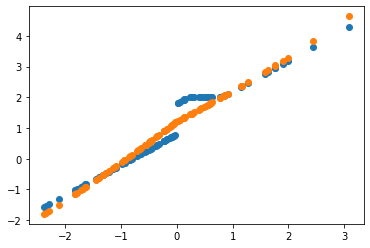

In [78]:
#linear regression
%reset -f

#lasso is also linear but eliminates coefs
import numpy as np
import matplotlib.pyplot as plt
x1=np.random.normal(0,1,100)
x2=np.random.normal(0,0,100)
x1_mat=x1.reshape(-1,1)
y=np.minimum(x1,0.2)+np.maximum(x1,0.8)+np.heaviside(x1,0.5)
plt.scatter(x1,y)

from sklearn import linear_model
reg = linear_model.LinearRegression()
#reg.fit(x1_mat,y)
x_inp=np.c_[x1,x1*x1,np.abs(x1)]
reg.fit(x_inp,y)
print(reg)
print(reg.coef_)
print(reg.intercept_)

yhat=reg.predict(x_inp)
plt.scatter(x1,yhat)

LinearRegression()


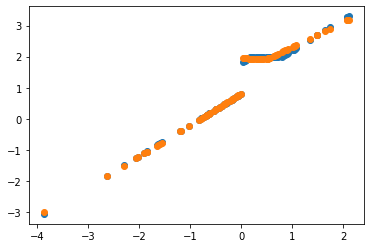

In [110]:
%reset -f

#lasso is also linear but eliminates coefs
import numpy as np
import matplotlib.pyplot as plt
x1=np.random.normal(0,1,100)
x2=np.random.normal(0,0,100)
x_inp=np.c_[x1,np.minimum(x1,0.5),np.maximum(x1,0.5),x1*x1,abs(x1),np.heaviside(x1,0)]
y=np.minimum(x1,0.2)+np.maximum(x1,0.8)+np.heaviside(x1,0.5)
plt.scatter(x1,y)

from sklearn import linear_model

model = linear_model.LinearRegression()

model.fit(x_inp,y)
print(model)
yhat=model.predict(x_inp)
plt.scatter(x1,yhat)

fit BayesianRidge
Convergence after  3  iterations
coef_ [ 0.57966093 -0.07516171  0.65482264  0.11588292 -0.70071489  1.13379961]
intercept_ 0.5238786458142315
alpha precision of noise 383.18931259016614
lambda_ precision of weight 1.948247423502389
sigma_ or Estimated variance-covariance matrix of the weights


,0,1,2,3,4,5
0,0.171168,-0.171316,-0.170797,-0.000104,-0.000019,0.000034
1,-0.171316,0.172716,0.169250,0.000485,0.000512,-0.000908
2,-0.170797,0.169250,0.173235,-0.000590,-0.000532,0.000943
3,-0.000104,0.000485,-0.000590,0.000361,-0.000258,-0.000196
4,-0.000019,0.000512,-0.000532,-0.000258,0.001033,-0.000389
5,0.000034,-0.000908,0.000943,-0.000196,-0.000389,0.000800


scores []
n_iter_ 4
X_offset_ [ 0.06860289 -0.1532555   0.72185839  1.03306418  0.82968312  0.54      ]
X_scale_ [1. 1. 1. 1. 1. 1.]
n_features_in_ 6


<ErrorbarContainer object of 3 artists>

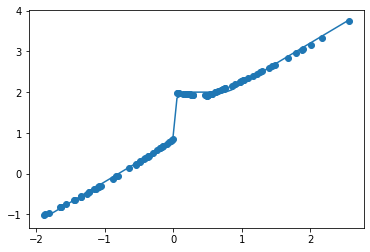

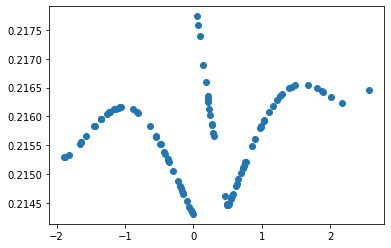

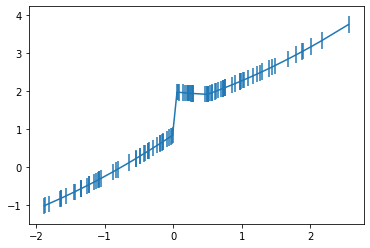

In [157]:
%reset -f


import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)

x1=np.random.normal(0,1,100)
x2=np.random.normal(0,0,100)

sort_ind=np.argsort(x1)
x1=x1[sort_ind]

x_inp=np.c_[x1,np.minimum(x1,0.5),np.maximum(x1,0.5),x1*x1,abs(x1),np.heaviside(x1,0)]
y=np.minimum(x1,0.2)+np.maximum(x1,0.8)+np.heaviside(x1,0.5)





model=0
yhat=0


model = sklearn.linear_model.LinearRegression()
model=model.fit(x_inp,y)
yhat_lin=model.predict(x_inp)


print('fit BayesianRidge')
model = sklearn.linear_model.BayesianRidge(n_iter=300, tol=0.001, alpha_1=1e-06
                                           , alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06
                                           , alpha_init=None, lambda_init=None
                                           , compute_score=False, fit_intercept=True
                                           , normalize='deprecated', copy_X=True, verbose=True)

model=model.fit(x_inp,y)
print('coef_',model.coef_)
print('intercept_',model.intercept_)
print('alpha precision of noise',model.alpha_)
print('lambda_ precision of weight',model.lambda_)
print('sigma_ or Estimated variance-covariance matrix of the weights')

df2=pd.DataFrame(model.sigma_)
display(df2.style.background_gradient(cmap=cm))
print('scores',model.scores_)
print('n_iter_',model.n_iter_)
print('X_offset_',model.X_offset_)
print('X_scale_',model.X_scale_)
print('n_features_in_',model.n_features_in_)

yhat,ystd=model.predict(x_inp,return_std=True)

plt.figure()
plt.plot(x1,y)
plt.scatter(x1,yhat)


plt.figure()
plt.scatter(x1,ystd)

plt.figure()

plt.errorbar(x1,yhat,ystd)
#residuals are constant it looks like!

# Automatic Relevance Determination Regression

fit Automatic Relevance Determination Regression
Converged after 5 iterations
sigma_ (or Estimated variance-covariance matrix of the weights)=


,0,1,2,3,4,5
0,0.001554,-0.000599,-0.002833,0.000247,0.000347,-0.000577
1,-0.000599,0.000605,0.000589,0.000002,0.000002,-0.000003
2,-0.002833,0.000589,0.006403,-0.000688,-0.000909,0.001176
3,0.000247,0.000002,-0.000688,0.000178,-0.000096,-0.000127
4,0.000347,0.000002,-0.000909,-0.000096,0.000666,-0.000165
5,-0.000577,-0.000003,0.001176,-0.000127,-0.000165,0.000526


coef_, Coefficients of the regression model (mean of distribution) 
 [ 6.03003675e-01 -1.10008899e-04  5.33728118e-01  9.70801967e-02
 -5.85426273e-01  1.05681078e+00] 

intercept_= 0.5890542301690301 

X_offset_= [ 0.19103809 -0.05423435  0.74527244  0.92416464  0.72533985  0.59      ] 

alpha (est precision of noise)= 355.51659554839046 

lambda_[Ndim] precision of weight 
 [2.73896781e+00 1.64638139e+03 3.43381621e+00 1.04121409e+02
 2.91213717e+00 8.94956810e-01]
scores= [] 

X_scale_= [1. 1. 1. 1. 1. 1.] 

n_features_in_= 6 



<ErrorbarContainer object of 3 artists>

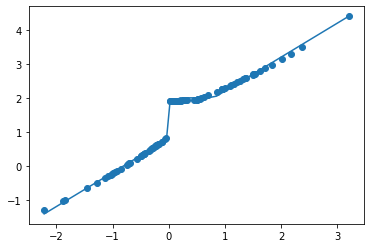

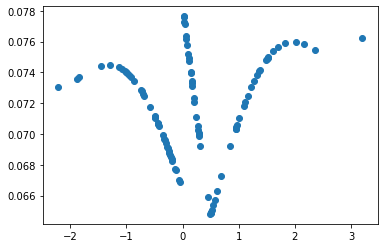

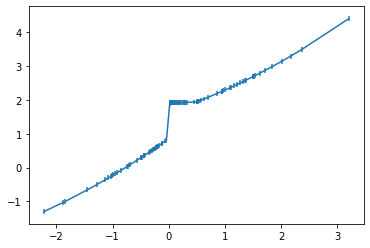

In [172]:
%reset -f


import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)

x1=np.random.normal(0,1,100)
x2=np.random.normal(0,0,100)

sort_ind=np.argsort(x1)
x1=x1[sort_ind]

x_inp=np.c_[x1,np.minimum(x1,0.5),np.maximum(x1,0.5),x1*x1,abs(x1),np.heaviside(x1,0)]
y=np.minimum(x1,0.2)+np.maximum(x1,0.8)+np.heaviside(x1,0.5)





model=0
yhat=0


model = sklearn.linear_model.LinearRegression()
model=model.fit(x_inp,y)
yhat_lin=model.predict(x_inp)


print('fit Automatic Relevance Determination Regression')

model=sklearn.linear_model.ARDRegression(n_iter=300, tol=0.001, alpha_1=1e-06, alpha_2=1e-06
                                         , lambda_1=1e-06, lambda_2=1e-06
                                         , compute_score=False, threshold_lambda=10000.0
                                         , fit_intercept=True, normalize='deprecated'
                                         , copy_X=True, verbose=True)


model=model.fit(x_inp,y)


print('sigma_ (or Estimated variance-covariance matrix of the weights)=')
df2=pd.DataFrame(model.sigma_)
display(df2.style.background_gradient(cmap=cm))

print('coef_, Coefficients of the regression model (mean of distribution) \n',model.coef_,'\n')
print('intercept_=',model.intercept_,'\n')
print('X_offset_=',model.X_offset_,'\n')

print('alpha (est precision of noise)=',model.alpha_,'\n')
print('lambda_[Ndim] precision of weight','\n',model.lambda_)
print('scores=',model.scores_,'\n')
print('X_scale_=',model.X_scale_,'\n')
print('n_features_in_=',model.n_features_in_,'\n')

yhat,ystd=model.predict(x_inp,return_std=True)

plt.figure()
plt.plot(x1,y)
plt.scatter(x1,yhat)


plt.figure()
plt.scatter(x1,ystd)

plt.figure()

plt.errorbar(x1,yhat,ystd)
#residuals are constant it looks like!

# (Heading) Logistic Regression

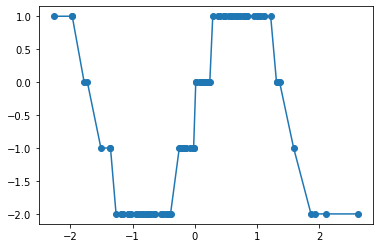

fit Automatic Relevance Determination Regression
classes_= [-2. -1.  0.  1.] 

coef_ 
 [[ 0.54424358 -0.95358731  1.49809976 -0.58825924  0.8814794  -2.00465867]
 [ 0.26029874  0.13544809  0.12473168  0.25082732 -1.20415786 -1.96976518]
 [-0.3271384  -0.53741799  0.20983278  0.26713553 -1.15700911  2.2556192 ]
 [-0.47740392  1.3555572  -1.83266422  0.07029639  1.47968758  1.71880465]] 

intercept_ 
 [-0.13419492  1.26244913 -0.81520476 -0.31304945] 



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


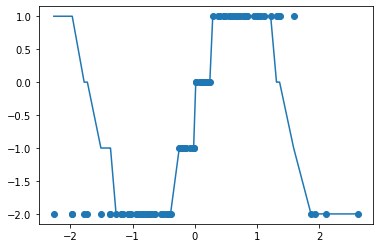

In [192]:
%reset -f


import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)

x1=np.random.normal(0,1,100)
x2=np.random.normal(0,1,100)

sort_ind=np.argsort(x1)
x1=x1[sort_ind]

x_inp=np.c_[x1,np.minimum(x1,0.5),np.maximum(x1,0.5),x1*x1,abs(x1),np.heaviside(x1,0)]
y=np.minimum(x1,0.2)+np.maximum(x1,0.8)+np.heaviside(x1,0.5)
y=np.floor(2*np.sin(2*x1))

plt.figure()
plt.plot(x1,y)
plt.scatter(x1,y)
plt.show()




model=0
yhat=0


model = sklearn.linear_model.LinearRegression()
model=model.fit(x_inp,y)
yhat_lin=model.predict(x_inp)


print('fit Automatic Relevance Determination Regression')

model=sklearn.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0
                                              , fit_intercept=True, intercept_scaling=1
                                              , class_weight=None, random_state=None
                                              , solver='lbfgs', max_iter=100
                                              , multi_class='auto', verbose=1
                                              , warm_start=False, n_jobs=None, l1_ratio=None)


model=model.fit(x_inp,y)




yhat=model.predict(x_inp)

plt.figure()
plt.plot(x1,y)
plt.scatter(x1,yhat)

print('classes_=',model.classes_,'\n')
print('coef_ \n',model.coef_,'\n')
print('intercept_ \n',model.intercept_,'\n')


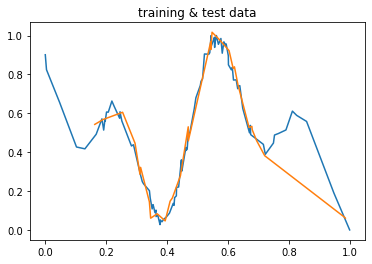

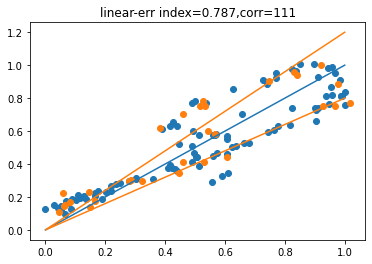

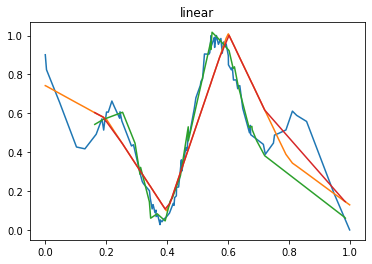

k nearest
effective_metric_= euclidean
effective_metric_params_= {}
n_features_in_= 2
n_samples_fit_= 100


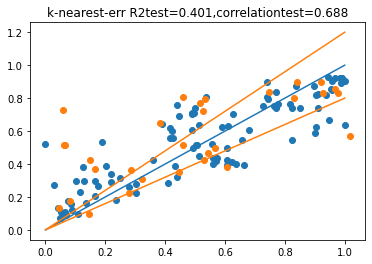

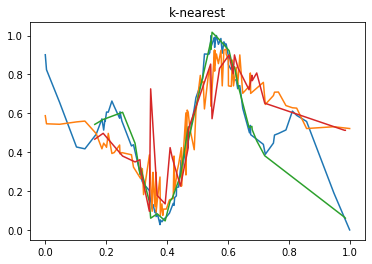

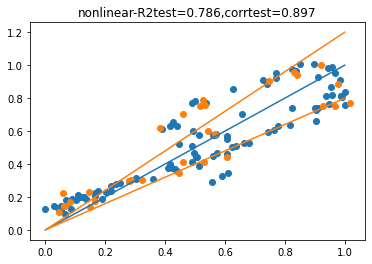

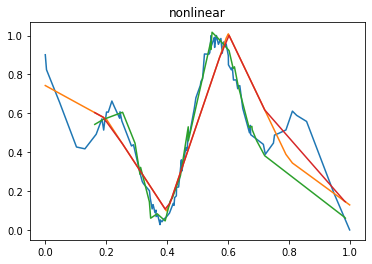

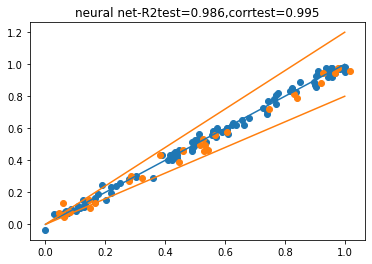

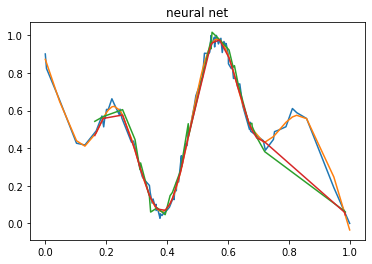

In [149]:
%reset -f

import scipy
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.neighbors
import pandas as pd
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)

X1=np.random.normal(0,1,100)
X2=np.random.normal(0,1,100)

X1test=np.random.normal(0,1,30)
X2test=np.random.normal(0,1,30)



Y=np.minimum(X1,0.2)+np.maximum(X2,0.8)+0.3*np.heaviside(X1-X2,0.5)+0.3*X2

def func_ref1(x1,x2):
    return np.sin(4*x1)+np.sin(2*x1)+0.1*x2

Y=func_ref1(X1,X2)
Ytest=func_ref1(X1test,X2test)


sort_ind=np.argsort(X1)
X1=X1[sort_ind]
X2=X2[sort_ind]
Y=Y[sort_ind]

sort_ind=np.argsort(X1test)
X1test=X1test[sort_ind]
X2test=X2test[sort_ind]
Ytest=Ytest[sort_ind]

#x=np.c_[x1,x2]

##########################
x1=(X1-np.min(X1))/(np.max(X1)-np.min(X1))
x2=(X2-np.min(X2))/(np.max(X2)-np.min(X2))
y=(Y-np.min(Y))/(np.max(Y)-np.min(Y))

x1test=(X1test-np.min(X1))/(np.max(X1)-np.min(X1))
x2test=(X2test-np.min(X2))/(np.max(X2)-np.min(X2))
ytest=(Ytest-np.min(Y))/(np.max(Y)-np.min(Y))
#######


plt.figure()
plt.title('training & test data')
plt.plot(x1,y)
plt.plot(x1test,ytest)
plt.show()

model=0
yhat=0




def funct_transform(x1,x2):
    #return np.c_[x1,x2]
    #return np.c_[x1,x2,x1*x1,x1*x1,x2*x2]
    #return np.c_[x1,x2,np.minimum(x1,0.5),np.minimum(x2,0.5),np.heaviside(x1-x2,0.5)]
    #return np.c_[x1,np.sqrt(x1),x1*x1,x1*x1*x1]
    #return np.c_[np.sin(1*x1test),np.sin(2*x1test),np.sin(0.5*x1test),np.sin(3*x1test)]
    #return np.c_[abs(x1),abs(x1),abs(x1-0.2),abs(x1-0.4),abs(x1-0.6),abs(x1-0.8),abs(x1-1)]
    c0=0.3
    return np.c_[x1,abs(x1-0),abs(x1-0.2),abs(x1-0.4),abs(x1-0.6),abs(x1-0.8),abs(x1-1)]


x_inp=funct_transform(x1,x2)
x_inp_test=funct_transform(x1test,x2test)


model = sklearn.linear_model.LinearRegression()
model=model.fit(x_inp,y)

yhat_lin=model.predict(x_inp)
yhat_lin_test=model.predict(x_inp_test)
mse_lin_test=np.mean((ytest-yhat_lin_test)**2)
err_lin_test=round(1-np.mean((ytest-yhat_lin_test)**2)/np.std(ytest)**2,3)


plt.figure()
plt.scatter(y,yhat_lin)
plt.scatter(ytest,yhat_lin_test)
plt.plot([0,1],[0,1])
plt.plot([1,0,1],[0.8,0,1.2])
plt.title('linear-err index='+str(err_lin_test)+',corr='+str(111))
plt.show()

plt.figure()
plt.title('linear')

plt.plot(x1,y)
plt.plot(x1,yhat_lin)

plt.plot(x1test,ytest)
plt.plot(x1test,yhat_lin_test)
plt.show()

x1train=x1
x2train=x2
ytrain=y

x_inp_train=np.c_[x1train,x2train]
x_inp_test=np.c_[x1test,x2test]

model=sklearn.neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance', leaf_size=30, p=2, metric='euclidean')
#model=sklearn.neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance', leaf_size=30, p=1, metric='manhattan')
model=sklearn.neighbors.RadiusNeighborsRegressor(radius=0.01, weights='distance', leaf_size=30, p=1, metric='manhattan')
#model=sklearn.neighbors.RadiusNeighborsRegressor(radius=0.01, weights='distance', leaf_size=30, p=2, metric='euclidean')
#p=1: absolute value distance, p=2: euclidian distance

model=sklearn.neighbors.RadiusNeighborsRegressor(radius=0.2)
model=sklearn.neighbors.KNeighborsRegressor(n_neighbors=10)

model=model.fit(x_inp_train,ytrain)

yhat_lin_train=model.predict(x_inp_train)
yhat_lin_test=model.predict(x_inp_test)

mse_lin_test=np.mean((ytest-yhat_lin_test)**2)
err_lin_test=round(1-np.mean((ytest-yhat_lin_test)**2)/np.std(ytest)**2,3)
corr_lin_test=round(np.corrcoef(ytest,yhat_lin_test)[0][1],3)

print('k nearest')
print('effective_metric_=',model.effective_metric_)
print('effective_metric_params_=',model.effective_metric_params_)
print('n_features_in_=',model.n_features_in_)
#print('feature_names_in_=',model.feature_names_in_)
print('n_samples_fit_=',model.n_samples_fit_)

plt.figure()
plt.scatter(ytrain,yhat_lin_train)
plt.scatter(ytest,yhat_lin_test)
plt.plot([0,1],[0,1])
plt.plot([1,0,1],[0.8,0,1.2])
plt.title('k-nearest-err R2test='+str(err_lin_test)+',correlationtest='+str(corr_lin_test))
plt.show()

plt.figure()
plt.plot(x1train,ytrain)
plt.plot(x1train,yhat_lin_train)
plt.plot(x1test,ytest)
plt.plot(x1test,yhat_lin_test)
plt.title('k-nearest')
plt.show()



def func_1(b,bb,x1,x2):
    bnew=b
    bnew[bb]=0

    #temp=b[0]+b[1]*x1+b[2]*x1*x1+b[3]*np.sqrt(x1)+b[4]*np.power(x1+b[5],b[6])
    #temp=b[1]+b[1]*x1
    
    #temp= b[0]+b[1]*x1+b[2]*x2+b[3]*np.minimum(x1,0.5+b[6])+b[4]*np.minimum(x2,0.5+b[7])+b[5]*np.heaviside(x1-x2,0.5+b[8])    
    
    #temp=bnew[0]+bnew[1]*np.power(x1+0.1,bnew[2])*np.power(x2+0.2,bnew[3])
    #temp+=       bnew[4]*np.power(x1+0.1,bnew[5])*np.power(x2+0.2,bnew[6])
    
    #temp=b[0]+b[1]*np.sin(b[2]+b[3]*x1)+b[4]*np.sin(b[5]+b[6]*x1)
    
    #temp=b[0]
    #temp+=b[1]*np.tanh(b[2]+b[3]*x1)
    #temp+=b[4]*np.tanh(b[5]+b[6]*x1)
    #temp+=b[7]*np.tanh(b[8]+b[9]*x1)
    N=len(x1)
    
    c=np.zeros(5)
    w=np.zeros(5)
    
    c0=b[6]
    c1=b[7]
    c2=b[8]
    c3=b[9]
    c4=b[10]
    c5=b[11]
    
    
    cc=0.1+b[0]
    w0=1-cc*abs(x1-0)
    w1=1-cc*abs(x1-0.2)
    w2=1-cc*abs(x1-0.4)
    w3=1-cc*abs(x1-0.6)
    w4=1-cc*abs(x1-0.8)
    w5=1-cc*abs(x1-1)  
    
    w0=1/(0.1+cc*abs(x1-0))
    w1=1/(0.1+cc*abs(x1-0.2))
    w2=1/(0.1+cc*abs(x1-0.4))
    w3=1/(0.1+cc*abs(x1-0.6))
    w4=1/(0.1+cc*abs(x1-0.8))
    w5=1/(0.1+cc*abs(x1-1))    
    
    cc=1+b[0]
    
    w0=np.exp(-cc*abs(x1-0))
    w1=np.exp(-cc*abs(x1-0.2))
    w2=np.exp(-cc*abs(x1-0.4))
    w3=np.exp(-cc*abs(x1-0.6))
    w4=np.exp(-cc*abs(x1-0.8))
    w5=np.exp(-cc*abs(x1-1))
    
    return (c0*w0+c1*w1+c2*w2+c3*w3+c4*w4+c5*w5)/(w0+w1+w2+w3+w4+w5)

    

def mse_func1(b,bb,x1,x2,y):
    yhat=func_1(b,bb,x1,x2)
    return np.sum((yhat-y)*(yhat-y))

b0=np.random.rand(12+1)*0.1
bb=[0]
optimize1=scipy.optimize.minimize(mse_func1, b0, args=(bb,x1,x2,y), method='BFGS')
b0=optimize1.x

#b_ones=np.ones(12+1)*0.1
bb=[]
optimize1=scipy.optimize.minimize(mse_func1, b0, args=(bb,x1,x2,y), method='BFGS',options={ 'finite_diff_rel_step': 0.01})
b0=optimize1.x


yhat_nonlin_train=func_1(b0,bb,x1train,x2train)
yhat_nonlin_test=func_1(b0,bb,x1test,x2test)

R2_nonlin_test=round(1-np.mean((ytest-yhat_nonlin_test)**2)/np.std(ytest)**2,3)
corr_nonlin_test=round(np.corrcoef(ytest,yhat_nonlin_test)[0][1],3)

plt.figure()
plt.scatter(ytrain,yhat_nonlin_train)
plt.scatter(ytest,yhat_nonlin_test)
plt.plot([0,1],[0,1])
plt.plot([1,0,1],[0.8,0,1.2])
plt.title('nonlinear-R2test='+str(R2_nonlin_test)+',corrtest='+str(corr_nonlin_test))
plt.show()

plt.figure()
plt.plot(x1train,ytrain)
plt.plot(x1train,yhat_nonlin_train)
plt.plot(x1test,ytest)
plt.plot(x1test,yhat_nonlin_test)
plt.title('nonlinear')
plt.show()






def func_1(b,bb,x1,x2):
    bnew=b
    bnew[bb]=0

    temp=b[0]
    temp+=b[1]*np.tanh(b[2]+b[3]*x1)
    temp+=b[4]*np.tanh(b[5]+b[6]*x1)
    temp+=b[7]*np.tanh(b[8]+b[9]*x1)
    temp+=b[10]*np.tanh(b[11]+b[12]*x1)
    return temp

    

def mse_func1(b,bb,x1,x2,y):
    yhat=func_1(b,bb,x1,x2)
    return np.sum((yhat-y)*(yhat-y))

b0=np.random.rand(12+1)*0.1
bb=[7,8,9,10,11,12]
optimize1=scipy.optimize.minimize(mse_func1, b0, args=(bb,x1train,x2train,ytrain), method='BFGS')
b0=optimize1.x

#b_ones=np.ones(12+1)*0.1
bb=[]
optimize1=scipy.optimize.minimize(mse_func1, b0, args=(bb,x1train,x2train,ytrain), method='BFGS',options={ 'finite_diff_rel_step': 0.01})
b0=optimize1.x


yhat_nonlin_train=func_1(b0,bb,x1train,x2train)
yhat_nonlin_test=func_1(b0,bb,x1test,x2test)

R2_nonlin_test=round(1-np.mean((ytest-yhat_nonlin_test)**2)/np.std(ytest)**2,3)
corr_nonlin_test=round(np.corrcoef(ytest,yhat_nonlin_test)[0][1],3)

plt.figure()
plt.scatter(ytrain,yhat_nonlin_train)
plt.scatter(ytest,yhat_nonlin_test)
plt.plot([0,1],[0,1])
plt.plot([1,0,1],[0.8,0,1.2])
plt.title('neural net-R2test='+str(R2_nonlin_test)+',corrtest='+str(corr_nonlin_test))
plt.show()

plt.figure()
plt.plot(x1train,ytrain)
plt.plot(x1train,yhat_nonlin_train)
plt.plot(x1test,ytest)
plt.plot(x1test,yhat_nonlin_test)
plt.title('neural net')
plt.show()


print('end')

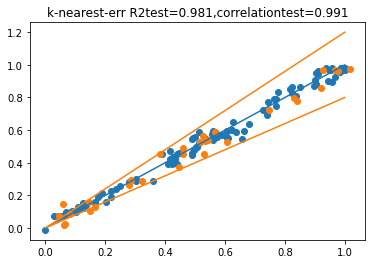

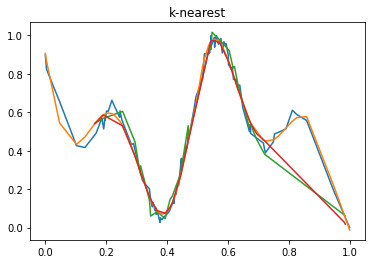

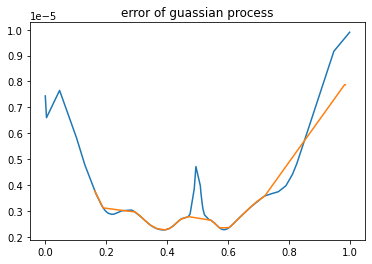

In [157]:
x_inp_train=np.c_[x1train,np.abs(x1train-0.5)]
x_inp_test=np.c_[x1test,np.abs(x1test-0.5)]


import sklearn.gaussian_process
model=sklearn.gaussian_process.GaussianProcessRegressor(kernel=None, alpha=1e-10
                                                        , optimizer='fmin_l_bfgs_b'
                                                        , n_restarts_optimizer=0
                                                        , normalize_y=False
                                                        , copy_X_train=True, random_state=None)


model=model.fit(x_inp_train,ytrain)

yhat_lin_train,ystd_train=model.predict(x_inp_train,return_std=True)
yhat_lin_test,ystd_test=model.predict(x_inp_test,return_std=True)

mse_lin_test=np.mean((ytest-yhat_lin_test)**2)
err_lin_test=round(1-np.mean((ytest-yhat_lin_test)**2)/np.std(ytest)**2,3)
corr_lin_test=round(np.corrcoef(ytest,yhat_lin_test)[0][1],3)


plt.figure()
plt.scatter(ytrain,yhat_lin_train)
plt.scatter(ytest,yhat_lin_test)
plt.plot([0,1],[0,1])
plt.plot([1,0,1],[0.8,0,1.2])
plt.title('k-nearest-err R2test='+str(err_lin_test)+',correlationtest='+str(corr_lin_test))
plt.show()

plt.figure()
plt.plot(x1train,ytrain)
plt.errorbar(x1train,yhat_lin_train,ystd_train)
plt.plot(x1test,ytest)
plt.errorbar(x1test,yhat_lin_test,ystd_test)
plt.title('k-nearest')
plt.show()


plt.figure()
plt.title('error of guassian process')
plt.plot(x1train,ystd_train)
plt.plot(x1test,ystd_test)
plt.show()

In [ ]:
#in guassian process you have to limit the number of points to 6 or 7
#but I don't know how the standard deviation is calculated!!

In [158]:
#for uncertainty analysis simply run the model then calculate x1 vs y-yhat in a bayesian regression!!!


In [163]:
import sklearn.linear_model
model2=sklearn.linear_model.BayesianRidge(n_iter=300, tol=0.001
                                          , alpha_1=1e-06, alpha_2=1e-06
                                          , lambda_1=1e-06, lambda_2=1e-06
                                          , alpha_init=None, lambda_init=None
                                          , compute_score=False, fit_intercept=True
                                          , normalize='deprecated', copy_X=True, verbose=False)

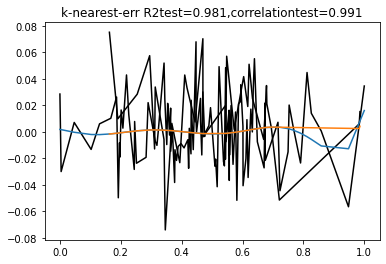

In [181]:
xx_train=x1train.reshape(-1,1)
xx_test=x1test.reshape(-1,1)


yy_train=ytrain-yhat_nonlin_train
yy_test=ytest-yhat_nonlin_test

model=model.fit(xx_train,yy_train)

yy_train_hat,yy_std_train=model.predict(xx_train,return_std=True)
yy_test_hat,yy_std_test=model.predict(xx_test,return_std=True)


plt.figure()
plt.plot(x1train,yy_train,'k')
plt.plot(x1test,yy_test,'k')
plt.errorbar(x1train,yy_train_hat,yy_std_train,ecolor='r')
plt.errorbar(x1test,yy_test_hat,yy_std_test,ecolor='r')
plt.title('k-nearest-err R2test='+str(err_lin_test)+',correlationtest='+str(corr_lin_test))
plt.show()



In [3]:
#genetic algorithm in python maybe? evolutionary? for neural networks? let's try it!!! using scipy


In [16]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt

Nx=10000
Ndim=2
X=np.random.rand(Nx,Ndim)
X1=X[:,0]
X2=X[:,1]
Y=np.sin(5*X1)







def func_nn(b,x):
    Nv=len(b)
    Nx=len(x)
    Nv=(Ndim+1)*Node+(Node+1)
    

    
    temp=b[0]+x[0]

In [ ]:
Nv=(Ndim+1)*Node1

# Heading: autoencoder, several layer NN

In [17]:
#maybe later implement 4 layer (2 hidden layers as well)
#node 1, node 2
#inputs = Ndim
#outputs = 1
#Nv=(Ndim+1)*Node1+(Node1+1)*Node2+(Node2+1)*1
#the output layer could even be tanh!!!

#if you want to try autoencoder we can try several inputs!!
#Nv=(Ndim+1)*Node1+(Node1+1)*Node2+(Node2+1)*Node3+(Node3+1)*Node4+(Node4+1)*Node5+(Node5+1)*Ndim
#Node1=Node5=10
#Node2=Node4=5
#node3=2 (the bottleneck)

# Heading: assymetric loss

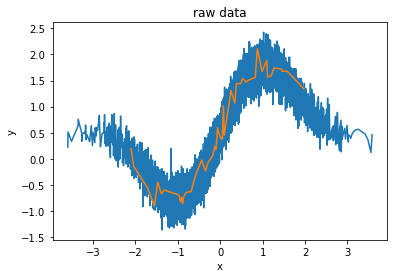

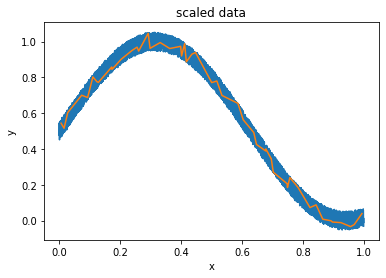

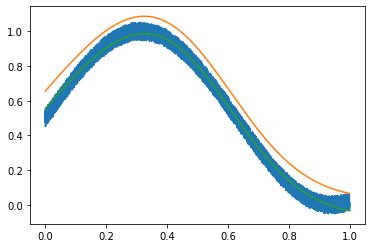

In [462]:
###########################################
#reset everything
%reset -f

###########################################
#import

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.neural_network
import scipy.optimize

###########################################
#number of vars
Ntrain=10000
Ntest=50
Ndim=2

###########################################
#create random inputs
Xtrain=np.random.normal(0,1,(Ntrain,Ndim))
Xtest=np.random.normal(0,1,(Ntest,Ndim))

###########################################
#function for making synthetic data
def func_synth_data(x):
    x1=x[:,0]
    x2=x[:,1]
    return 0.5+0.5*np.sin(2*x1)+np.sin(x1)+0.2*x2

###########################################
#creating synthetic data
Ytrain=func_synth_data(Xtrain)
Ytest=func_synth_data(Xtest)

###########################################
#sorting data
ind_train=np.argsort(Xtrain[:,0])
ind_test=np.argsort(Xtest[:,0])

for i in range(Ndim):
    #train    
    temp=Xtrain[:,i]
    temp=temp[ind_train]
    Xtrain[:,i]=temp
    #test
    temp=Xtest[:,i]
    temp=temp[ind_test]
    Xtest[:,i]=temp

Ytrain=Ytrain[ind_train]
Ytest=Ytest[ind_test]

###########################################
#plot raw data
plt.figure()
plt.plot(Xtrain[:,0],Ytrain)
plt.plot(Xtest[:,0],Ytest)
plt.title('raw data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



###########################################
#define variables for scaled data
xtrain=np.zeros((Ntrain,Ndim))
ytrain=np.zeros(Ntrain)

xtest=np.zeros((Ntest,Ndim))
ytest=np.zeros(Ntest)

###########################################
#scale data
for i in range(Ndim):
    min_=np.min(Xtrain[:,i])
    max_=np.max(Xtrain[:,i])
    temp=Xtrain[:,i]
    temp=(temp-min_)/(max_-min_)
    xtrain[:,i]=(Xtrain[:,i]-min_)/(max_-min_)
    xtest[:,i]=(Xtest[:,i]-min_)/(max_-min_)

min_=np.min(Ytrain)
max_=np.max(Ytrain)
ytrain=(Ytrain-min_)/(max_-min_)
ytest=(Ytest-min_)/(max_-min_)


###########################################
#using uniform distribution to initialize data
xtrain=np.random.rand(Ntrain,Ndim)
ytrain=np.random.rand(Ntrain)
xtest=np.random.rand(Ntest,Ndim)
ytest=np.random.rand(Ntest)

noise_train=0.1*(np.random.rand(Ntrain)-0.5)
noise_test=0.1*(np.random.rand(Ntest)-0.5)



#sor it
ind_train=np.argsort(xtrain[:,0])
ind_test=np.argsort(xtest[:,0])
for i in range(Ndim):
    temp=xtrain[:,i]
    temp=temp[ind_train]
    xtrain[:,i]=temp
    
    temp=xtest[:,i]
    temp=temp[ind_test]
    xtest[:,i]=temp

    
    
ytrain=ytrain[ind_train]
ytest=ytest[ind_test]




def func_synthetic2(x,noise):
    x1=x[:,0]
    x2=x[:,1]-0.5
    return 0.5+0.5*np.sin(5*x1)+0.01*x2+noise

ytrain=func_synthetic2(xtrain,noise_train)
ytest=func_synthetic2(xtest,noise_test)



##moving on

###########################################
#create function for neural network


###########################################
#define x1
x1train=xtrain[:,0]
x1test=xtest[:,0]

###########################################
#plot scaled function
plt.figure()
plt.plot(xtrain[:,0],ytrain)
plt.plot(xtest[:,0],ytest)
plt.title('scaled data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


#def function make columne 


###########################################
#neural network function with 1 hidden layer




    
node1=3
node2=2
N_hiddenlayer=1
layer=N_hiddenlayer+2

verbose_=False
net1=sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(node1,node2), activation='tanh' , batch_size=200,max_iter=5000, max_fun=150000)
net1=sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(node1,), activation='tanh')

net1.fit(xtrain,ytrain)
net1.fit(np.c_[xtrain[:,0],xtrain[:,1]*0],ytrain)


intercepts=net1.intercepts_
coefs=net1.coefs_

ytrain_sklearn=net1.predict(xtrain)
ytest_sklearn=net1.predict(xtest)

intercepts0=intercepts[0]
intercepts1=intercepts[1]
coefs0=coefs[0]
coefs1=coefs[1]
intercepts2=None
coefs2=None
if N_hiddenlayer==2:
    intercepts2=intercepts[2]
    coefs2=coefs[2]

N_hiddenlayer==net1.n_layers_

###########################################
#asymetric error function
def func_err_assym(y,yhat,a=0.5):
    if a==0.5:
        return np.mean((y-yhat)*(y-yhat))
    else:
        err=yhat-y
        err_overest=np.mean(err[err>0]*err[err>0])
        err_underest=np.mean(err[err<0]*err[err<0])
        return err_overest*a+err_underest*(1-a)


###########################################
#create random inputs for the neural network (3 or 4 layer) (1hidden & 2 hidden)

coef0=np.random.rand(Ndim,node1)
intercept0=np.random.rand(node1)

if N_hiddenlayer==1:
    coef1=np.random.rand(node1)
    intercept1=np.random.rand(1)
    coef2=None
    intercept2=None
if N_hiddenlayer==2:
    coef1=np.random.rand(node1,node2)
    intercept1=np.random.rand(node2)
    coef2=np.random.rand(node2)
    intercept2=np.random.rand(1)

    
    
###########################################
# flatten coefficients into one vector
def func_NN_coef_b(intercept0,coef0,intercept1,coef1,intercept2=None,coef2=None):
    a0=np.append(np.matrix.flatten(intercept0),np.matrix.flatten(coef0))
    a1=np.append(np.matrix.flatten(intercept1),np.matrix.flatten(coef1))
    temp=np.append(a0,a1)
    if intercept2!=None:
        a2=np.append(np.matrix.flatten(intercept2),np.matrix.flatten(coef2))
        temp=np.append(temp,a2)
    return temp

b_optimize=func_NN_coef_b(intercept0,coef0,intercept1,coef1,intercept2,coef2)
b_sklearn=func_NN_coef_b(intercepts0,coefs0,intercepts1,coefs1,intercepts2,coefs2)
b=b_optimize   
    
###########################################
# expand vector into sep matrices
def func_b_coef(b,Ndim,node1,node2,N_hiddenlayer):
    if N_hiddenlayer==1:
        intercept0=b[0:node1]
        i=node1
        coef0=b[i:i+Ndim*node1].reshape(Ndim,node1)
        i+=Ndim*node1
        intercept1=b[i:i+1]
        i+=1
        coef1=b[i:i+node1]
        intercept2=None
        coef2=None
    else:
        intercept0=b[0:node1]
        i=node1
        coef0=b[i:i+Ndim*node1].reshape(Ndim,node1)
        i+=Ndim*node1
        intercept1=b[i:i+node2]
        i+=node2
        coef1=b[i:i+node1*node2].reshape(node1,node2)
        i+=node1*node2
        intercept2=b[i:i+1]
        i+=1
        coef2=b[i:i+node2]
        
    return (intercept0,coef0,intercept1,coef1,intercept2,coef2)

(intercept0_,coef0_,intercept1_,coef1_,intercept2_,coef2_)=func_b_coef(b,Ndim,node1,node2,N_hiddenlayer)


###########################################
def func_nn(b,x,Ndim,node1,node2,N_hiddenlayer):
    (intercept0_,coef0_,intercept1_,coef1_,intercept2_,coef2_)=func_b_coef(b,Ndim,node1,node2,N_hiddenlayer)
    if N_hiddenlayer==1:
        xl1=np.tanh(intercept0_+np.matmul(x,coef0_))
        xl2=        intercept1_+np.matmul(xl1,coef1_)
        return xl2
    if N_hiddenlayer==2:
        xl1=np.tanh(intercept0_+np.matmul(x,coef0_))
        xl2=np.tanh(intercept1_+np.matmul(xl1,coef1_))
        xl3=        intercept2_+np.matmul(xl2,coef2_)
        return xl3

yhat=func_nn(b_sklearn,xtrain,Ndim,node1,node2,N_hiddenlayer)

plt.figure()
plt.plot(xtrain[:,0],ytrain)
plt.plot(xtrain[:,0],yhat+0.1)
plt.plot(xtrain[:,0],ytrain_sklearn)
plt.show()

###########################################
#define error function for use in optimization
def func_mse(b,x,y,Ndim,node1,node2,N_hiddenlayer,a=0.5):
    yhat=func_nn(b,x,Ndim,node1,node2,N_hiddenlayer)
    return func_err_assym(y,yhat,a)


In [2]:
1+1

2

time for partial= 1.4789981842041016
time for lambda =  1.4630000591278076


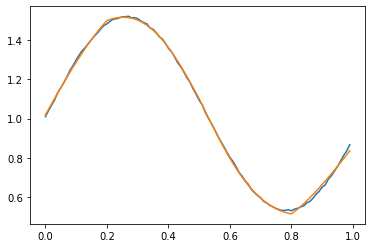

In [8]:
%reset -f
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from functools import partial
import time


def func_synth(x):
    return 0.5+0.01*x+0.02*np.sqrt(x)+0.5+0.5*np.sin(6*x)

def func_f(b,x):
    return b[0]+b[1]*x+b[2]*np.sqrt(x+1)+b[3]*abs(x-0.2)+b[4]*np.abs(x-0.5)+b[5]*abs(x-0.8)+b[6]*np.tanh(x)+b[7]*np.tanh(0.5*x)+b[8]*np.tanh(4*(x-0.5))

def func_mse(b,x,y):
    yhat=func_f(b,x)
    return np.mean((y-yhat)*(y-yhat))

def func_mse1(x,y,b):
    yhat=func_f(b,x)
    return np.mean((y-yhat)*(y-yhat))


Nx=100
Nv=10
x=np.random.rand(Nx)
x=np.arange(Nx)/Nx

b0=np.random.rand(Nv)
oo=np.ones(Nv)

y=func_synth(x)+np.random.rand(Nx)*0.01

#anonymous function
func_g1 = partial(func_mse1, x,y) #anonymous function
func_g2 = lambda b: func_mse1(x,y,b)



Niter=10000
bb=np.random.rand(Nv,Niter)
a=np.zeros(Niter)
ind=np.arange(Niter)

func_g3 = lambda i: func_g1(bb[:,i])



start = time.time()
#@nb.njit( parallel=True)
for i in range(Niter):
    a[i]=func_g1(bb[:,i])
print('time for partial=',time.time() - start)


start = time.time()
#@nb.njit( parallel=True)
for i in range(Niter):
    a[i]=func_g2(bb[:,i])
print('time for lambda = ',time.time() - start)

b0=bb[:,np.argmin(a)]

bounds0=np.c_[-5*oo,5*oo]

#optimize2=scipy.optimize.minimize(func_mse,b0,args=(x,y),bounds=np.c_[-5*oo,5*oo])
#optimize2=scipy.optimize.minimize(func_g1,b0)
#optimize2=scipy.optimize.minimize(func_g1,b0,bounds=bounds0)
optimize2=scipy.optimize.basinhopping(func_g1,b0) 
#optimize2=scipy.optimize.differential_evolution(func_g1,bounds0)
#optimize2=scipy.optimize.shgo(func_g1,bounds0)
#optimize2=scipy.optimize.dual_annealing(func_g1,bounds0)
b0=optimize2.x

#optimize2=scipy.optimize.brute(func_g1,bounds0)
#b0=optimize2



yhat=func_f(b0,x)

plt.plot(x,y)
plt.plot(x,yhat)

In [548]:
b0

array([-0.73244494,  1.12986888,  0.18199744, -0.54283006, -0.14186488,
        0.78617645,  1.46883963,  1.19844035, -1.16076854,  0.42629763])

In [526]:
b0

array([-8.01519759, -3.73404413,  8.54098131,  0.47814522])

In [559]:

ff = lambda b: x +b
x=2.1
print(ff(5))
x=3.1
print(ff(5.1))

7.1
8.2


In [487]:
xx=np.c_[xtrain[:,0],xtrain[:,1]*0]
xx=xtrain

b_new=np.random.rand(len(b_sklearn))
b_new=b_sklearn
oo=np.ones(len(b_new))

#optmz1=scipy.optimize.minimize(func_mse,b_sklearn,args=(xx,ytrain,Ndim,node1,node2,N_hiddenlayer,0.5))
#optmz1=scipy.optimize.minimize(func_mse,b_sklearn,args=(xx,ytrain,Ndim,node1,node2,N_hiddenlayer,0.5),bounds=np.c_[-3*oo,3*oo])
optmz1=scipy.optimize.differential_evolution(func_mse,args=(xx,ytrain,Ndim,node1,node2,N_hiddenlayer,0.5),bounds=np.c_[-3*oo,3*oo])
scipy.optimize.basinhopping

#optmz2=scipy.optimize.differential_evolution(func, bounds, args=(), strategy='best1bin', maxiter=1000, popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7, seed=None, callback=None, disp=False, polish=True, init='latinhypercube', atol=0, updating='immediate', workers=1, constraints=(), x0=None)
b_new=optmz1.x

ytrain_optimize=func_nn(b_new,xx,Ndim,node1,node2,N_hiddenlayer)

plt.figure()
plt.plot(xtrain[:,0],ytrain-ytrain_sklearn,'r')
plt.plot(xtrain[:,0],ytrain-ytrain_optimize,'b')
plt.show()

KeyboardInterrupt: 

In [485]:
min(b_new),max(b_new)

(-3.0, 2.3225085978629876)

In [448]:
b

array([0.13736834, 0.91887856, 0.59074324, 0.71647799, 0.12432661,
       0.68854114, 0.99690612, 0.72886088, 0.09945964, 0.82423208,
       0.69566582, 0.34706586, 0.33035925, 0.52315929, 0.79128087,
       0.7934648 , 0.34258754, 0.05807195, 0.49047665, 0.62909473,
       0.81037781])

In [327]:
intercept0_.shape
x=xtrain
print(x.shape)
print(coef0_.shape)


display(pd.DataFrame(xl1))
print(intercept1_.shape)
print(xl1.shape)
print(coef1_.shape)

display(pd.DataFrame(xl2))


(100, 2)
(2, 10)


,0,1,2,3,4,5,6,7,8,9
0,0.387775,0.093625,0.406040,0.127205,0.688533,0.799210,0.768792,0.535442,0.738697,0.570197
1,0.397764,0.210293,0.487048,0.242321,0.754800,0.818925,0.799281,0.636762,0.847308,0.706204
2,0.424533,0.235045,0.517329,0.261610,0.774074,0.827088,0.807953,0.657069,0.869517,0.735102
3,0.402957,0.228930,0.501582,0.259906,0.765378,0.822579,0.804285,0.651703,0.861277,0.725382
4,0.529645,0.299712,0.612109,0.303891,0.828051,0.853346,0.833307,0.707958,0.920197,0.806568
...,...,...,...,...,...,...,...,...,...,...
95,0.292235,0.401838,0.554238,0.450101,0.819019,0.831767,0.834570,0.770810,0.933493,0.846899
96,0.327606,0.410282,0.576202,0.452610,0.829442,0.838237,0.839360,0.776676,0.939667,0.855722
97,0.537840,0.474497,0.707334,0.478991,0.888971,0.877126,0.870137,0.817931,0.970513,0.907774
98,0.633168,0.509862,0.765363,0.494965,0.913455,0.895022,0.885122,0.838657,0.980497,0.929033


(1,)
(100, 10)
(10,)


,0
0,3.371831
1,3.697153
2,3.793754
3,3.750548
4,4.079380
...,...
95,4.016215
96,4.076923
97,4.454260
98,4.629945


In [289]:
print('intercept0')
print(intercept0)
print(intercept0_)

print('coef0')
print(coef0)
print(coef0_)
      

print('intercept1')
print(intercept1)
print(intercept1_)

print('coef1')
print(coef1)
print(coef1_)

print('intercept2')
print(intercept2)
print(intercept2_)

print('coef2')
print(coef2)
print(coef2_)

intercept0
[0.37443585 0.6233552  0.30054134 0.82399985 0.2394282  0.47206941
 0.2166245  0.90448773 0.99350257 0.74865379]
[0.37443585 0.6233552  0.30054134 0.82399985 0.2394282  0.47206941
 0.2166245  0.90448773 0.99350257 0.74865379]
coef0
[[0.4618103  0.79278878 0.55834995 0.33228305 0.24304798 0.57891721
  0.51950212 0.4687735  0.05303076 0.16969015]
 [0.11035783 0.57172262 0.97901345 0.4491999  0.33367508 0.68351247
  0.80338936 0.89478591 0.44231557 0.40082455]]
[[0.4618103  0.79278878 0.55834995 0.33228305 0.24304798 0.57891721
  0.51950212 0.4687735  0.05303076 0.16969015]
 [0.11035783 0.57172262 0.97901345 0.4491999  0.33367508 0.68351247
  0.80338936 0.89478591 0.44231557 0.40082455]]
intercept1
[0.98495667]
[0.98495667]
coef1
[0.6718476  0.43590051 0.76306114 0.44435844 0.62239758 0.62405096
 0.17974317 0.94717689 0.38019696 0.96392794]
[0.6718476  0.43590051 0.76306114 0.44435844 0.62239758 0.62405096
 0.17974317 0.94717689 0.38019696 0.96392794]
intercept2
None
None
coef2

In [287]:
###########################################
#print sklearn neural net coefs & my coefs

print('intercept 0')
display(pd.DataFrame(intercepts0))
display(pd.DataFrame(intercept0))

print('coef0')
display(pd.DataFrame(coefs0))
display(pd.DataFrame(coef0))

print('intercept1')
display(pd.DataFrame(intercepts0))
display(pd.DataFrame(intercept0))

print('coef1')
display(pd.DataFrame(coefs1))
display(pd.DataFrame(coef1))

print('intercept2')
display(pd.DataFrame(intercepts2))
display(pd.DataFrame(intercept2))

print('coef2')
display(pd.DataFrame(coefs2))
display(pd.DataFrame(coef2))  


intercept 0


,0
0,-0.215816
1,-0.675477
2,-0.065392
3,-0.465809
4,0.045330
5,-0.534909
6,0.193353
7,0.753863
8,0.050910
9,0.472624


,0
0,0.948073
1,0.849373
2,0.790349
3,0.266808
4,0.627948
5,0.124891
6,0.164512
7,0.727541
8,0.482157
9,0.795206


coef0


,0,1,2,3,4,5,6,7,8,9
0,0.735302,0.283434,0.000078,-0.031158,-0.222434,0.020428,-0.456116,-0.477909,0.667727,0.435991
1,0.799624,0.451091,-0.006303,-0.407184,-0.137509,0.059685,-0.563323,-0.308956,-0.249848,0.224832


,0,1,2,3,4,5,6,7,8,9
0,0.732888,0.412870,0.845417,0.694265,0.508414,0.525392,0.369909,0.131888,0.795427,0.223065
1,0.389629,0.948157,0.017397,0.397409,0.786669,0.094209,0.580098,0.183327,0.846910,0.920378


intercept1


,0
0,-0.215816
1,-0.675477
2,-0.065392
3,-0.465809
4,0.045330
5,-0.534909
6,0.193353
7,0.753863
8,0.050910
9,0.472624


,0
0,0.948073
1,0.849373
2,0.790349
3,0.266808
4,0.627948
5,0.124891
6,0.164512
7,0.727541
8,0.482157
9,0.795206


coef1


,0,1,2,3,4
0,0.687438,-0.154491,-0.406348,-0.200286,0.564795
1,0.213080,0.396758,0.006741,-0.251690,-0.376118
2,0.443154,0.248976,0.080529,-0.054521,0.040797
3,0.212217,-0.003260,0.205040,-0.121596,-0.159671
4,0.350675,-0.201361,-0.056812,0.027567,-0.383896
5,-0.002017,-0.320648,0.241873,-0.000228,0.119146
6,0.510279,-0.012932,0.102105,0.223448,-0.105080
7,0.169690,0.364022,-0.293620,-0.046479,0.345167
8,0.876246,-0.151068,-0.001517,-0.354700,0.339131
9,-0.298139,0.225333,0.436783,-0.064493,0.475993


,0,1,2,3,4
0,0.279406,0.906244,0.596361,0.734752,0.948563
1,0.226240,0.191228,0.447643,0.532939,0.801691
2,0.666328,0.322621,0.571378,0.302627,0.515847
3,0.144155,0.179648,0.108294,0.767437,0.958197
4,0.191873,0.835659,0.270996,0.687053,0.074715
5,0.376964,0.894972,0.457652,0.489469,0.608589
6,0.050036,0.684979,0.777705,0.462135,0.440896
7,0.144873,0.760423,0.443512,0.597807,0.060105
8,0.774067,0.508368,0.803189,0.163996,0.428438
9,0.683892,0.067140,0.484023,0.638111,0.069709


intercept2


,0
0,-0.638268


,0
0,0.674691


coef2


,0
0,0.162198
1,-0.267826
2,-0.213699
3,0.090091
4,0.751443


,0
0,0.581634
1,0.931500
2,0.320198
3,0.168404
4,0.207901


In [247]:
np.random.rand()

0.3348310172142738

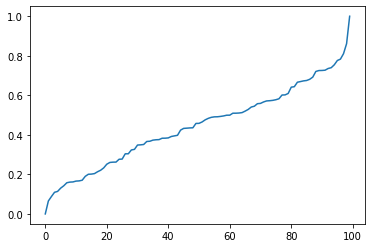

In [248]:
plt.plot(x1train)

In [129]:
intercepts0

array([ 0.30475462, -0.2219467 ,  0.80267927, -0.68705073,  0.26270702])

In [130]:
intercepts1

array([0.44985619])

In [131]:
coefs0

array([[ 0.63657567,  0.05695183,  0.15177489, -0.71915859, -0.33326857],
       [ 0.14750139,  0.87197527, -0.9421171 , -0.73011282,  0.57547373]])

In [133]:
coefs1

array([[ 0.45031184],
       [ 0.36658425],
       [-0.5708205 ],
       [-0.3576652 ],
       [-0.36044487]])

In [146]:
intercepts1

array([0.1152137])

In [147]:
np.random.rand(1)

array([0.40377215])

In [148]:
np.random.rand()

0.9303175573469404

In [221]:
def f(x, y = 0):
    if y==0:
        x=x+1
    else:
        x=x+y[0]+y[1]
    return x

x=1
print(f(x))
print(x)

print(f(x,[0,2]))
print(f(x))

2
1
3
2


3

IndexError: index 3 is out of bounds for axis 0 with size 3

NameError: name 'y1' is not defined